#  Credit Card Fraud Detection


### Team memebers:
#### Aleesha Reez
#### Ria Agnes Jose
#### Sowmya Benakappa

#### Our project is about the analysis of the credit card fraud detection using the Kaggle dataset
#### https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

#### The project detects the fraudulent transaction using Deep Neural Networks(Keras) that involves pattern classification in an unbalanced dataset


In [1]:
#importing libraries

import numpy as np 
import pandas as pd
from math import sqrt
import keras
import tensorflow as tf
from keras import backend as K

from imblearn.over_sampling import ADASYN 
from collections import Counter
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython

import warnings
warnings.filterwarnings('ignore')

import sklearn.utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam, Nadam, RMSprop
from sklearn.metrics import auc

from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std



Using TensorFlow backend.


### Reading Data from csv file

In [2]:
path = %pwd
creditdata = pd.read_csv(f'{path}/creditcard.csv')
print(creditdata.shape)

(284807, 31)


In [3]:
creditdata.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Data Exploration and Imputation

In [4]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

instances found: 284807 and attributes found :  31.

In [5]:
#Summary of null values
creditdata.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

we found no missing values.

In [6]:
creditdata.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
creditdata['Class'].nunique()

2

we have encountered only 2 classes.

In [8]:
creditdata['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Genuine(0):284315  Fraudulent(1): 492. it is a complete imbalance of classes.

<AxesSubplot:>

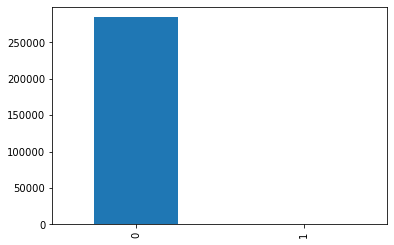

In [9]:
#The below graph gives a visual representation of the class imbalance.
creditdata.Class.value_counts().plot.bar()

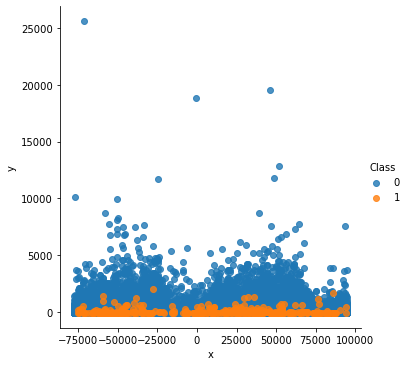

In [10]:
#For a better visualization of the imbalance in the datasets used PCA
pca= PCA(n_components=2)
creditdata_graph= pd.DataFrame(pca.fit_transform(creditdata.iloc[:,0:30]))
creditdata_graph= pd.concat([creditdata_graph, creditdata['Class']], axis=1)
creditdata_graph.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditdata_graph, fit_reg=False, hue='Class')

In [11]:
#calculating percentage for each class
(creditdata.Class.value_counts())/(creditdata.Class.count())

0    0.998273
1    0.001727
Name: Class, dtype: float64

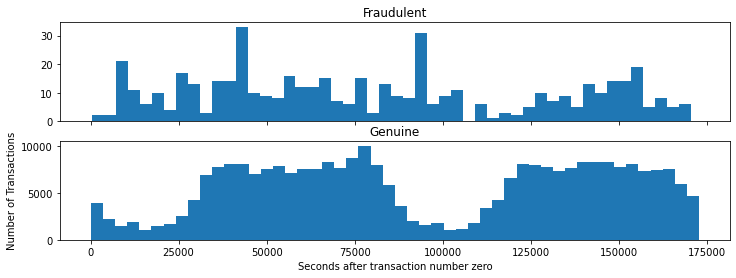

In [12]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(creditdata["Time"][creditdata["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditdata["Time"][creditdata["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

time feature does not provide any useful information.Thus,we'll drop this feature.

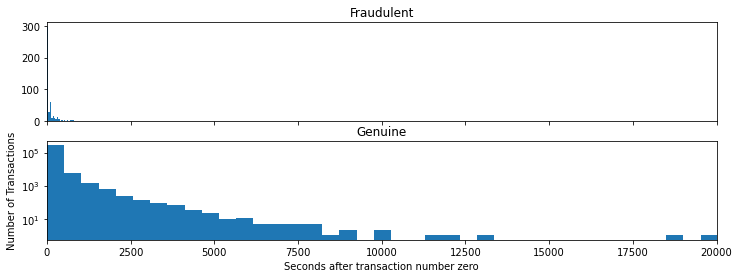

In [13]:
#Histrogram for Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(12,4))

ax1.hist(creditdata["Amount"][creditdata["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditdata["Amount"][creditdata["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()


In [14]:
#Time column is dropped because of no valuable information
creditdata = creditdata.drop("Time", axis = 1)
creditdata.shape

(284807, 30)

In [15]:
#since the magnitude for amount is larger than the others,let's scale Amount column.
creditdata.var()

V1            3.836489
V2            2.726820
V3            2.299029
V4            2.004684
V5            1.905081
V6            1.774946
V7            1.530401
V8            1.426479
V9            1.206992
V10           1.185594
V11           1.041855
V12           0.998403
V13           0.990571
V14           0.918906
V15           0.837803
V16           0.767819
V17           0.721373
V18           0.702539
V19           0.662662
V20           0.594325
V21           0.539526
V22           0.526643
V23           0.389951
V24           0.366808
V25           0.271731
V26           0.232543
V27           0.162919
V28           0.108955
Amount    62560.069046
Class         0.001725
dtype: float64

### Data Pre-Processing: 

#### since our dataset is a classification problem, we used StandardScaler to pre process the data.

#### Standardize columns by removing the mean and scaling to unit variance

#### It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

In [16]:
sc = StandardScaler()
creditdata['Std_Amount'] = sc.fit_transform(creditdata['Amount'].values.reshape(-1, 1))
creditdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [17]:
#drop Amount and move Std_Amount at index '0'
creditdata = creditdata.drop('Amount',axis=1)

Std_Amount = creditdata['Std_Amount']
creditdata.drop('Std_Amount', axis=1, inplace=True)
creditdata.insert(0, 'Std_Amount', Std_Amount)
creditdata.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the data into train,test and validation

In [18]:
X = creditdata.drop('Class', axis=1)
Y = creditdata['Class']

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X,Y,test_size=0.2, random_state=42)

Xtrain_final , Xval , Ytrain_final , Yval = train_test_split(Xtrain,Ytrain,test_size=0.2, random_state=42)


##### After splitting,datasets created are:
##### a)Train Dataset: Xtrain_final, Ytrain_final
##### b)Validation Dataset: Xval, Yval
##### c)Test Dataset: Xtest, Ytest


In [19]:
#below shows the dataset for train, test and validation after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(182276, 29)
(182276,)
(56962, 29)
(56962,)
(45569, 29)
(45569,)


In [20]:
#instances for each class in the train dataset
print(Ytrain_final.value_counts())

0    181946
1       330
Name: Class, dtype: int64


### Using ADASYN for Oversampling on the training set

#### To balance the instances per each class,we are performing Oversampling technique

#### ADASYN algorithm is to use a density distribution as a criterion to automatically decide the number of synthetic samples that need to be generated for each minority data example.It is based on the idea of adaptively generating minority data samples according to their distributions,more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn.

In [21]:
ada_sample = ADASYN(sampling_strategy='minority', random_state=42)

X_adasampled, Y_adasampled = ada_sample.fit_sample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 181983, 0: 181946})
Shape of X_adasampled: (363929, 29)
Shape of Y_adasampled: (363929,)


 #### X_adasampled and Y_adasampled are the balanced train sets resulted after OverSampling.

In [22]:
df_Xada_train = pd.DataFrame(X_adasampled)
df_Xada_train.columns = Xtrain.columns
df_Yada_train = pd.DataFrame(Y_adasampled)
df_Yada_train = df_Yada_train.rename(columns={0: 'Class'})
print(df_Xada_train.head())
print(df_Yada_train.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.350151 -3.017333  3.215950 -2.844590 -1.341856 -0.491730 -1.776197   
1   -0.161321  2.099809 -0.890100 -2.817319 -1.208673  0.845043  0.138699   
2    0.568609  0.812352 -0.586909 -0.667514  0.962864  0.401248  0.721682   
3    1.998245 -2.621263 -4.439432 -2.595440 -1.117193  2.489633 -2.625322   
4   -0.273348  2.227359 -1.572316 -0.371772 -1.578679 -1.593467 -0.157863   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0  0.071360  1.470371  0.070087  ... -0.174083  0.338884  0.258544  0.843397   
1  0.064751 -0.009282 -0.974776  ...  0.211516 -0.196549  0.567082  1.621804   
2  0.343162  0.121239  0.059051  ...  0.292052  0.259607  0.084476 -0.144437   
3  1.207772 -0.457577 -1.353822  ... -0.269584  2.078601  1.265437  1.872310   
4 -1.598295  0.004422 -1.074622  ...  0.064945 -0.362887  0.089499  0.852866   

        V23       V24       V25       V26       V27     

In [23]:
#single dataframe after merging in order to visualize a correlation matrix
df_new= pd.merge(df_Xada_train, df_Yada_train, how='inner', left_index=True, right_index=True)
df_new.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.350151,-3.017333,3.215950,-2.844590,-1.341856,-0.491730,-1.776197,0.071360,1.470371,0.070087,...,0.338884,0.258544,0.843397,0.086503,0.026228,0.082502,0.112516,0.618475,0.454782,0
1,-0.161321,2.099809,-0.890100,-2.817319,-1.208673,0.845043,0.138699,0.064751,-0.009282,-0.974776,...,-0.196549,0.567082,1.621804,-0.242970,-1.581675,0.522156,0.415164,-0.070427,-0.118390,0
2,0.568609,0.812352,-0.586909,-0.667514,0.962864,0.401248,0.721682,0.343162,0.121239,0.059051,...,0.259607,0.084476,-0.144437,-0.487009,-1.312940,0.806243,-0.202556,-0.027304,0.024049,0
3,1.998245,-2.621263,-4.439432,-2.595440,-1.117193,2.489633,-2.625322,1.207772,-0.457577,-1.353822,...,2.078601,1.265437,1.872310,1.862566,0.615607,-0.594514,-0.172620,0.199639,0.485647,0
4,-0.273348,2.227359,-1.572316,-0.371772,-1.578679,-1.593467,-0.157863,-1.598295,0.004422,-1.074622,...,-0.362887,0.089499,0.852866,0.098889,-0.305689,-0.178513,0.009100,0.045008,-0.053145,0


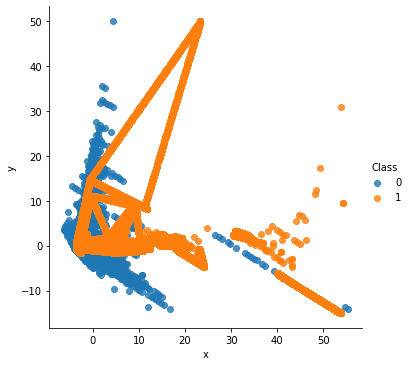

In [24]:
#visualizing balanced train dataset
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

### Building Deep Neural Network model
#### A deep neural network is an artificial neural network with multiple layers between the input and output layers.
#### The neural network needs to learn all the time to solve tasks in a more qualified manner or even to use various methods to provide a better result. When it gets new information in the system, it learns how to act accordingly to a new situation.Learning becomes deeper when tasks you solve get harder. Deep neural network represents the type of machine learning when the system uses many layers of nodes to derive high-level functions from input information. It means transforming the data into a more creative and abstract component.Since it is important for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.Therefore, we used DNN to solve this problem.



In [25]:
def create_model(activation='relu', optimizer=Adam, learning_rate=0.5, dropout=0.25):
    model = Sequential()
    # Layers
    model.add(Dense(16, input_dim=X_adasampled.shape[1],
                    activation=activation,
                    kernel_initializer='uniform'))
    model.add(Dense(units=18, kernel_initializer='uniform', activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(units=20, kernel_initializer='uniform', activation=activation))
    model.add(Dense(units=24, kernel_initializer='uniform', activation=activation))
    # Last layer
    model.add(Dense(1, activation='sigmoid',
                    kernel_initializer='uniform'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(lr=learning_rate),
                  metrics=['accuracy'])
    
    return model

In [26]:
dnn_model = create_model()
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                306       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,695
Trainable params: 1,695
Non-trainable params: 0
____________________________________________________

In [27]:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(X_adasampled, Y_adasampled, 
                        validation_data=(Xval, Yval),
                        batch_size=15,
                        epochs=10)

Train on 363929 samples, validate on 45569 samples
Epoch 1/10
363929/363929 [==============================] - 37s 100us/step - loss: 0.0483 - accuracy: 0.9856 - val_loss: 0.0459 - val_accuracy: 0.9881
Epoch 2/10
363929/363929 [==============================] - 33s 92us/step - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.0221 - val_accuracy: 0.9952
Epoch 3/10
363929/363929 [==============================] - 33s 92us/step - loss: 0.0146 - accuracy: 0.9967 - val_loss: 0.0256 - val_accuracy: 0.9959
Epoch 4/10
363929/363929 [==============================] - 33s 91us/step - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.0203 - val_accuracy: 0.9969
Epoch 5/10
363929/363929 [==============================] - 33s 92us/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.0265 - val_accuracy: 0.9967
Epoch 6/10
363929/363929 [==============================] - 33s 91us/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.0275 - val_accuracy: 0.9964
Epoch 7/10
363929/363929 [======================

### Evaluation on the Validation set


In [28]:
score = dnn_model.evaluate(Xval, Yval, batch_size=15)
print('\nAnd the Score is ', score[1] * 100, '%')

45569/45569 [==============================] - 2s 36us/step

And the Score is  99.69277381896973 %


In [29]:
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

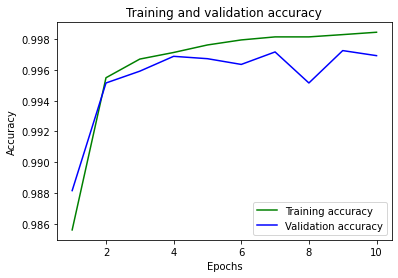

In [30]:
epochs = range(1,11)
plt.plot(epochs,train_acc,'g',label = 'Training accuracy')
plt.plot(epochs,valid_acc,'b',label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluation on the Test set

In [31]:
test_score = dnn_model.evaluate(Xtest,Ytest)
print ("Accuracy: %.2f%%" %(test_score[1]*100))

56962/56962 [==============================] - 1s 17us/step
Accuracy: 99.71%


### Roc curve on validation set

roc-auc is 0.966


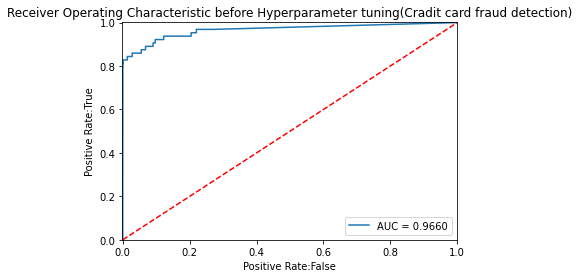

In [32]:
y_pred= dnn_model.predict(Xval)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Yval, y_pred)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

print('roc-auc is {:.3f}'.format(roc_auc_score(Yval, y_pred)))

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic before Hyperparameter tuning(Cradit card fraud detection)')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('Positive Rate:True')
plt.xlabel('Positive Rate:False')
plt.show();

### Roc curve on test set

roc-auc is 0.971


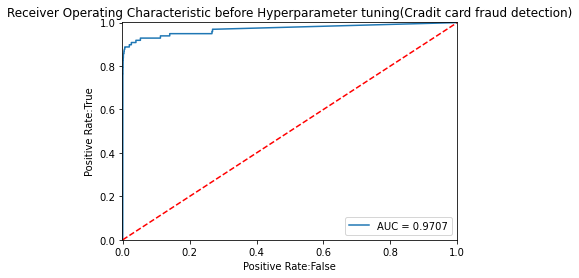

In [33]:
y_pred= dnn_model.predict(Xtest)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

print('roc-auc is {:.3f}'.format(roc_auc_score(Ytest, y_pred)))

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic before Hyperparameter tuning(Cradit card fraud detection)')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('Positive Rate:True')
plt.xlabel('Positive Rate:False')
plt.show();

In [34]:
#function for confusion matrix
def conf_matrix(values_predicted):
    Predictions_matrix = confusion_matrix(Ytest.values, values_predicted, labels = [0, 1])
    class_feat=creditdata['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_matrix, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

56962/56962 [==============================] - 1s 17us/step
Accuracy MLP before hyper parameter tuning: 0.9971384406089783
56962/56962 [==============================] - 1s 18us/step
Loss value before hyper parameter tuning: 0.025017799936921544
Recall_score before hyper parameter tuning: 0.8571428571428571
Precision_score before hyper parameter tuning: 0.3605150214592275
F-score before hyper parameter tuning: 0.5075528700906344


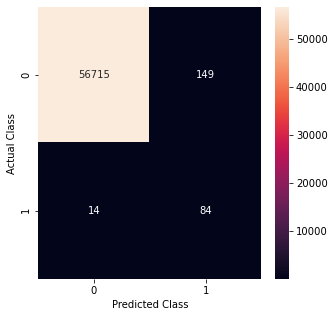

In [35]:
print('Accuracy MLP before hyper parameter tuning: '+ str(dnn_model.evaluate(Xtest.values,Ytest.values)[1]))
print('Loss value before hyper parameter tuning: '+ str(dnn_model.evaluate(Xtest.values,Ytest.values)[0]))

Y_pred = dnn_model.predict_classes(Xtest.values, batch_size=200, verbose=0)
print('Recall_score before hyper parameter tuning: ' + str(recall_score(Ytest.values,Y_pred)))
print('Precision_score before hyper parameter tuning: ' + str(precision_score(Ytest.values, Y_pred)))
print('F-score before hyper parameter tuning: ' + str(f1_score(Ytest.values,Y_pred)))
conf_matrix(Y_pred)

# DNN model Hyperparameter tuning


### Using grid search to get the best parameters

In [36]:
# define the grid search parameters
optimizer = [Adam, Nadam]
activation = ['relu', 'elu']
epochs = [5, 8, 10]
batch_size = [15, 20]

# create model
kmodel = KerasClassifier(build_fn=create_model)
param_grid = dict( 
    activation=activation, 
    optimizer=optimizer,
    epochs = epochs,
    batch_size = batch_size
)

param_grid

{'activation': ['relu', 'elu'],
 'optimizer': [keras.optimizers.Adam, keras.optimizers.Nadam],
 'epochs': [5, 8, 10],
 'batch_size': [15, 20]}

In [37]:
grid = GridSearchCV(estimator=kmodel, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_adasampled, Y_adasampled, validation_data=(Xval, Yval))

Train on 363929 samples, validate on 45569 samples
Epoch 1/10
363929/363929 [==============================] - 27s 73us/step - loss: 246.0473 - accuracy: 0.4983 - val_loss: 2.2209 - val_accuracy: 0.0014
Epoch 2/10
363929/363929 [==============================] - 26s 72us/step - loss: 0.8849 - accuracy: 0.5016 - val_loss: 0.2428 - val_accuracy: 0.9986
Epoch 3/10
363929/363929 [==============================] - 27s 75us/step - loss: 0.9064 - accuracy: 0.4996 - val_loss: 0.4976 - val_accuracy: 0.9986
Epoch 4/10
363929/363929 [==============================] - 26s 73us/step - loss: 0.9073 - accuracy: 0.5006 - val_loss: 0.8301 - val_accuracy: 0.0014
Epoch 5/10
363929/363929 [==============================] - 27s 75us/step - loss: 0.9031 - accuracy: 0.5009 - val_loss: 0.4013 - val_accuracy: 0.9986
Epoch 6/10
363929/363929 [==============================] - 27s 74us/step - loss: 0.9107 - accuracy: 0.5007 - val_loss: 0.1391 - val_accuracy: 0.9986
Epoch 7/10
363929/363929 [=====================

In [38]:
# best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print(grid_result.best_params_)

Best: 0.501184 using {'activation': 'elu', 'batch_size': 20, 'epochs': 10, 'optimizer': <class 'keras.optimizers.Adam'>}
{'activation': 'elu', 'batch_size': 20, 'epochs': 10, 'optimizer': <class 'keras.optimizers.Adam'>}


In [39]:
best_params = grid_result.best_params_
activation = best_params.get('activation')
optimizer = best_params.get('optimizer')
epochs = best_params.get('epochs')
batch_size = best_params.get('batch_size')
tuned_model = create_model(activation=activation, optimizer=optimizer)

tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = tuned_model.fit(X_adasampled, Y_adasampled, 
                        validation_data=(Xval, Yval),
                        batch_size=batch_size,
                        epochs=epochs)



Train on 363929 samples, validate on 45569 samples
Epoch 1/10
363929/363929 [==============================] - 28s 76us/step - loss: 0.0891 - accuracy: 0.9701 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 2/10
363929/363929 [==============================] - 27s 73us/step - loss: 0.0359 - accuracy: 0.9907 - val_loss: 0.0523 - val_accuracy: 0.9864
Epoch 3/10
363929/363929 [==============================] - 27s 73us/step - loss: 0.0279 - accuracy: 0.9931 - val_loss: 0.0312 - val_accuracy: 0.9928
Epoch 4/10
363929/363929 [==============================] - 27s 74us/step - loss: 0.0229 - accuracy: 0.9946 - val_loss: 0.0384 - val_accuracy: 0.9909
Epoch 5/10
363929/363929 [==============================] - 27s 74us/step - loss: 0.0165 - accuracy: 0.9961 - val_loss: 0.0321 - val_accuracy: 0.9935
Epoch 6/10
363929/363929 [==============================] - 31s 86us/step - loss: 0.0129 - accuracy: 0.9971 - val_loss: 0.0210 - val_accuracy: 0.9958
Epoch 7/10
363929/363929 [=======================

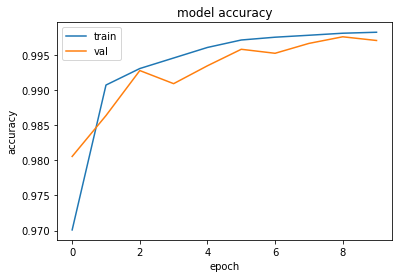

In [40]:
# Plotting Training accuracy vs Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluation on the Validation set

In [41]:
valid_score = tuned_model.evaluate(Xval,Yval)
print ("Accuracy: %.2f%%" %(valid_score[1]*100))

45569/45569 [==============================] - 1s 20us/step
Accuracy: 99.71%


### Evaluating tuned model on Test set

In [42]:
test_score = tuned_model.evaluate(Xtest,Ytest)
print ("Accuracy: %.2f%%" %(test_score[1]*100))

56962/56962 [==============================] - 1s 19us/step
Accuracy: 99.69%


### Roc curve on Validation set

roc-auc is 0.945


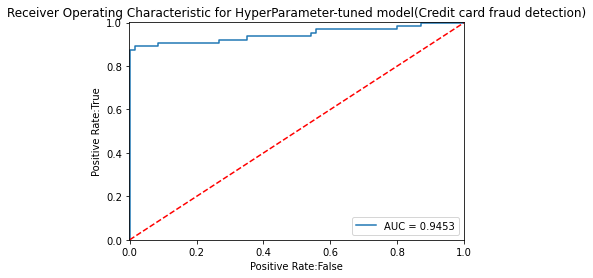

In [43]:
y_pred= tuned_model.predict(Xval)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Yval, y_pred)

# AUC
auc_keras = auc(fpr, tpr)

print('roc-auc is {:.3f}'.format(roc_auc_score(Yval, y_pred)))

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for HyperParameter-tuned model(Credit card fraud detection)')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('Positive Rate:True')
plt.xlabel('Positive Rate:False')
plt.show();

### Roc curve on Test set

roc-auc is 0.968


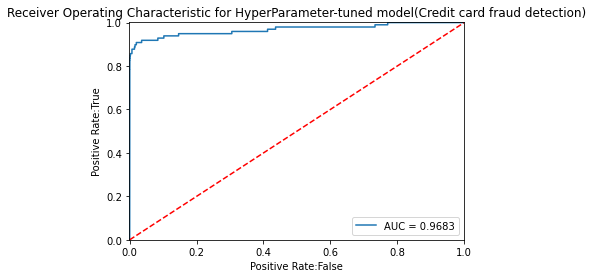

In [44]:
y_pred= tuned_model.predict(Xtest)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# AUC
auc_keras = auc(fpr, tpr)

print('roc-auc is {:.3f}'.format(roc_auc_score(Ytest, y_pred)))

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for HyperParameter-tuned model(Credit card fraud detection)')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('Positive Rate:True')
plt.xlabel('Positive Rate:False')
plt.show();

56962/56962 [==============================] - 1s 16us/step
Accuracy MLP: 0.9968926906585693
56962/56962 [==============================] - 1s 17us/step
Loss value: 0.017440572462879403
Recall_score: 0.8571428571428571
Precision_score: 0.340080971659919
F-score: 0.4869565217391304


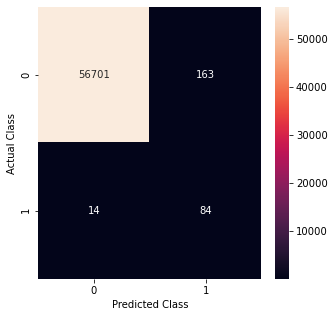

In [45]:
print('Accuracy MLP: '+ str(tuned_model.evaluate(Xtest.values,Ytest.values)[1]))
print('Loss value: '+ str(tuned_model.evaluate(Xtest.values,Ytest.values)[0]))

Y_pred = tuned_model.predict_classes(Xtest.values, batch_size=200, verbose=0)
print('Recall_score: ' + str(recall_score(Ytest.values,Y_pred)))
print('Precision_score: ' + str(precision_score(Ytest.values, Y_pred)))
print('F-score: ' + str(f1_score(Ytest.values,Y_pred)))
conf_matrix(Y_pred)

### Ensembling : Stacking

#### Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

In [46]:
#using dnn, knn, randomn forest classifiers for ensembling
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators = 100,
                                 bootstrap = True)

dnn_model = KerasClassifier(build_fn=create_model, verbose=0)
dnn_model._estimator_type = "classifier"

knn_model = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform' )


#meta classifier
random_forest =RandomForestClassifier()

def get_stacking_with_dnn():
    stacking_classifier = StackingClassifier(classifiers=[dnn_model], 
                          use_probas=True,
                          meta_classifier=random_forest)
    return stacking_classifier

def get_stacking_with_dnn_and_rand():
    stacking_classifier = StackingClassifier(classifiers=[dnn_model,random_forest_classifier], 
                          use_probas=True,
                          meta_classifier=random_forest)
    return stacking_classifier

# get a list of models to evaluate
def get_models():
    models = dict()
    models['dnn'] = dnn_model
    models['rf'] = random_forest_classifier
    models['knn'] = knn_model
    models['stackdnn'] = get_stacking_with_dnn()
    models['stackdnnrandom'] = get_stacking_with_dnn_and_rand()

    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print('model ',model)
    model.fit(X, y)
    scores = cross_val_score(model, Xtest, Ytest, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_adasampled, Y_adasampled)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


model  <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023408F51AC8>
>dnn 0.998 (0.000)
model  RandomForestClassifier(n_jobs=-1)
>rf 0.999 (0.000)
model  KNeighborsClassifier()
>knn 0.999 (0.000)
model  StackingClassifier(classifiers=[<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023408F51AC8>],
                   meta_classifier=RandomForestClassifier(), use_probas=True)
>stackdnn 0.998 (0.000)
model  StackingClassifier(classifiers=[<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023408F51AC8>,
                                RandomForestClassifier(n_jobs=-1)],
                   meta_classifier=RandomForestClassifier(), use_probas=True)
>stackdnnrandom 0.999 (0.000)


#### we have now compared KNN, DNN, Random Forest and a hybrid model(using DNN and Random Forest)
#### If we look at the accuracy, the hybrid model shows higher accuracy compared to other models because two models were combined to get a better result.In our case the output of DNN is the input for the random forest classifier(meta classifier)

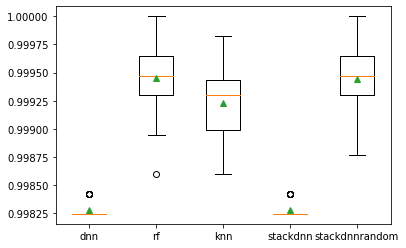

In [47]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()